In [13]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
from timm import create_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

from torch.cuda.amp import autocast, GradScaler
# dataset path
data_dir = r"C:\Users\sahba\Downloads\archive (2)\IMG_CLASSES"

# augmentation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),

    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# loading the dataset
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)


print("Classes:", full_dataset.classes)

from torch.utils.data import random_split, DataLoader

# calculating sizes for train, val, and test (70%, 15%, 15%)
total_size = len(full_dataset)
train_size = int(0.7 * total_size)
val_size = int(0.15 * total_size)
test_size = total_size - train_size - val_size 

# spliting the dataset
train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# creating DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Classes: ['10. Warts Molluscum and other Viral Infections - 1887', '2. Melanoma 2697', '4. Carcinoma  2215', '5. Melanocytic Nevi (NV) - 6944', '8. Seborrheic Keratoses and other Benign Tumors - 1827', '9. Tinea Ringworm Candidiasis and other Fungal Infections - 1644']


In [ ]:
# number of samples per class
class_counts = [
    #1670,    # 1_Eczema
    2697,    # 2_Melanoma

    2215,    # 4_Carcinoma
    6944,    # 5_Melanocytic_Nevi
    
    1827,    # 8_Seborrheic_Keratoses_and_other_Benign_Tumors
    1644,    # 9_TineaRingwormCandidiasis_and_other_Fungal_Infections
    1887     # 10_WartsMolluscum_and_other_Viral_Infections
]

# converting to tensor and compute weights
class_counts_tensor = torch.tensor(class_counts, dtype=torch.float)
class_weights = 1.0 / class_counts_tensor
class_weights = class_weights / class_weights.sum() * len(class_counts)  # normalization to match number of classes
class_weights = class_weights.to(device) 

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
print(torch.cuda.get_device_name(0)) 

# Load the pre-trained EfficientNet_b0  model
model_name = "efficientnet_b0"

model = create_model(model_name, pretrained=True, num_classes=6)

num_classes = 6


model = model.to(device)

Using device: cuda
NVIDIA GeForce RTX 4060 Laptop GPU


C:\Users\sahba\AppData\Local\Temp\ipykernel_17304\139996235.py:29: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Epoch [1/75]


Training:   0%|          | 0/377 [00:00<?, ?it/s]C:\Users\sahba\AppData\Local\Temp\ipykernel_17304\139996235.py:48: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Train Loss: 1.7166, Train Acc: 55.68%
✅ Best model saved!
Val Loss: 1.3356, Val Acc: 65.30%

Epoch [2/75]


Train Loss: 1.1898, Train Acc: 68.90%
✅ Best model saved!
Val Loss: 1.1219, Val Acc: 70.53%

Epoch [3/75]


Train Loss: 1.0368, Train Acc: 72.81%
✅ Best model saved!
Val Loss: 1.0265, Val Acc: 73.36%

Epoch [4/75]


Train Loss: 0.9478, Train Acc: 75.26%
✅ Best model saved!
Val Loss: 0.9546, Val Acc: 75.18%

Epoch [5/75]


Train Loss: 0.8766, Train Acc: 78.21%
✅ Best model saved!
Val Loss: 0.9050, Val Acc: 75.42%

Epoch [6/75]


Train Loss: 0.8351, Train Acc: 79.90%
✅ Best model saved!
Val Loss: 0.8563, Val Acc: 78.52%

Epoch [7/75]


Train Loss: 0.7894, Train Acc: 81.80%
Val Loss: 0.8340, Val Acc: 78.29%

Epoch [8/75]


Train Loss: 0.7539, Train Acc: 82.61%
✅ Best model saved!
Val Loss: 0.7980, Val Acc: 80.73%

Epoch [9/75]


Train Loss: 0.7319, Train Acc: 83.91%
Val Loss: 0.7856, Val Acc: 80.22%

Epoch [10/75]


Train Loss: 0.7039, Train Acc: 85.34%
✅ Best model saved!
Val Loss: 0.7726, Val Acc: 81.74%

Epoch [11/75]


Train Loss: 0.6824, Train Acc: 86.62%
✅ Best model saved!
Val Loss: 0.7530, Val Acc: 83.02%

Epoch [12/75]


Train Loss: 0.6597, Train Acc: 87.71%
✅ Best model saved!
Val Loss: 0.7241, Val Acc: 83.99%

Epoch [13/75]


Train Loss: 0.6502, Train Acc: 88.24%
Val Loss: 0.7200, Val Acc: 83.71%

Epoch [14/75]


Train Loss: 0.6332, Train Acc: 88.89%
✅ Best model saved!
Val Loss: 0.6931, Val Acc: 84.88%

Epoch [15/75]


Train Loss: 0.6169, Train Acc: 89.61%
✅ Best model saved!
Val Loss: 0.6843, Val Acc: 85.73%

Epoch [16/75]


Train Loss: 0.6074, Train Acc: 90.42%
✅ Best model saved!
Val Loss: 0.6864, Val Acc: 85.81%

Epoch [17/75]


Train Loss: 0.5947, Train Acc: 90.83%
✅ Best model saved!
Val Loss: 0.6769, Val Acc: 86.39%

Epoch [18/75]


Train Loss: 0.5837, Train Acc: 91.45%
✅ Best model saved!
Val Loss: 0.6700, Val Acc: 86.82%

Epoch [19/75]


Train Loss: 0.5707, Train Acc: 92.26%
✅ Best model saved!
Val Loss: 0.6568, Val Acc: 87.44%

Epoch [20/75]


Train Loss: 0.5635, Train Acc: 92.44%
✅ Best model saved!
Val Loss: 0.6667, Val Acc: 87.98%

Epoch [21/75]


Train Loss: 0.5520, Train Acc: 93.25%
✅ Best model saved!
Val Loss: 0.6430, Val Acc: 88.10%

Epoch [22/75]


Train Loss: 0.5462, Train Acc: 93.44%
✅ Best model saved!
Val Loss: 0.6325, Val Acc: 89.45%

Epoch [23/75]


Train Loss: 0.5327, Train Acc: 94.07%
Val Loss: 0.6413, Val Acc: 88.37%

Epoch [24/75]


Train Loss: 0.5312, Train Acc: 94.06%
Val Loss: 0.6337, Val Acc: 88.25%

Epoch [25/75]


Train Loss: 0.5246, Train Acc: 94.57%
Val Loss: 0.6267, Val Acc: 89.07%

Epoch [26/75]


Train Loss: 0.5208, Train Acc: 94.56%
Val Loss: 0.6313, Val Acc: 89.26%

Epoch [27/75]


Train Loss: 0.5117, Train Acc: 95.50%
Val Loss: 0.6338, Val Acc: 88.48%

Epoch [28/75]


Train Loss: 0.5084, Train Acc: 95.57%
✅ Best model saved!
Val Loss: 0.6199, Val Acc: 89.69%

Epoch [29/75]


Train Loss: 0.4989, Train Acc: 96.08%
✅ Best model saved!
Val Loss: 0.6054, Val Acc: 90.19%

Epoch [30/75]


Train Loss: 0.4976, Train Acc: 96.07%
Val Loss: 0.6250, Val Acc: 89.80%

Epoch [31/75]


Train Loss: 0.4971, Train Acc: 96.18%
Val Loss: 0.6115, Val Acc: 90.03%

Epoch [32/75]


Train Loss: 0.4923, Train Acc: 96.53%
Val Loss: 0.6249, Val Acc: 89.84%

Epoch [33/75]


Train Loss: 0.4857, Train Acc: 96.93%
Val Loss: 0.6058, Val Acc: 89.88%

Epoch [34/75]


Train Loss: 0.4833, Train Acc: 97.07%
✅ Best model saved!
Val Loss: 0.6073, Val Acc: 90.97%

Epoch [35/75]


Train Loss: 0.4780, Train Acc: 97.10%
Val Loss: 0.5953, Val Acc: 90.07%

Epoch [36/75]


Train Loss: 0.4762, Train Acc: 97.34%
Val Loss: 0.5950, Val Acc: 90.38%

Epoch [37/75]


Train Loss: 0.4734, Train Acc: 97.47%
Val Loss: 0.6095, Val Acc: 90.85%

Epoch [38/75]


Train Loss: 0.4724, Train Acc: 97.43%
Val Loss: 0.6013, Val Acc: 90.54%

Epoch [39/75]


Train Loss: 0.4737, Train Acc: 97.50%
Val Loss: 0.5999, Val Acc: 90.07%

Epoch [40/75]


Train Loss: 0.4715, Train Acc: 97.39%
Val Loss: 0.5917, Val Acc: 90.93%

Epoch [41/75]


Train Loss: 0.4707, Train Acc: 97.62%
Val Loss: 0.5997, Val Acc: 89.76%

Epoch [42/75]


Train Loss: 0.4699, Train Acc: 97.62%
Val Loss: 0.5848, Val Acc: 90.93%

Epoch [43/75]


Train Loss: 0.4680, Train Acc: 97.63%
Val Loss: 0.5935, Val Acc: 90.93%

Epoch [44/75]


Train Loss: 0.4672, Train Acc: 97.71%
✅ Best model saved!
Val Loss: 0.5874, Val Acc: 91.51%

Epoch [45/75]


Train Loss: 0.4659, Train Acc: 97.89%
✅ Best model saved!
Val Loss: 0.5824, Val Acc: 91.74%

Epoch [46/75]


Train Loss: 0.4642, Train Acc: 97.67%
Val Loss: 0.5948, Val Acc: 91.12%

Epoch [47/75]


Train Loss: 0.4635, Train Acc: 97.74%
Val Loss: 0.5901, Val Acc: 90.77%

Epoch [48/75]


Train Loss: 0.4655, Train Acc: 97.78%
Val Loss: 0.5858, Val Acc: 91.08%

Epoch [49/75]


Train Loss: 0.4605, Train Acc: 98.12%
Val Loss: 0.5812, Val Acc: 91.20%

Epoch [50/75]


Train Loss: 0.4610, Train Acc: 97.99%
✅ Best model saved!
Val Loss: 0.5786, Val Acc: 91.78%

Epoch [51/75]


Train Loss: 0.4625, Train Acc: 97.87%
Val Loss: 0.5798, Val Acc: 91.51%

Epoch [52/75]


Train Loss: 0.4642, Train Acc: 97.79%
Val Loss: 0.5804, Val Acc: 90.93%

Epoch [53/75]


Train Loss: 0.4598, Train Acc: 98.01%
Val Loss: 0.5841, Val Acc: 91.66%

Epoch [54/75]


Train Loss: 0.4593, Train Acc: 98.11%
Val Loss: 0.5886, Val Acc: 91.16%

Epoch [55/75]


Train Loss: 0.4576, Train Acc: 98.23%
Val Loss: 0.5950, Val Acc: 91.00%

Epoch [56/75]


Train Loss: 0.4587, Train Acc: 98.05%
Val Loss: 0.6060, Val Acc: 91.00%

Epoch [57/75]


Train Loss: 0.4581, Train Acc: 98.13%
Val Loss: 0.5892, Val Acc: 90.85%

Epoch [58/75]


Train Loss: 0.4562, Train Acc: 98.26%
Val Loss: 0.5810, Val Acc: 91.12%

Epoch [59/75]


Train Loss: 0.4601, Train Acc: 98.02%
✅ Best model saved!
Val Loss: 0.5819, Val Acc: 91.97%

Epoch [60/75]


Train Loss: 0.4602, Train Acc: 98.09%
Val Loss: 0.5905, Val Acc: 90.85%

Epoch [61/75]


Train Loss: 0.4560, Train Acc: 98.27%
Val Loss: 0.5713, Val Acc: 91.97%

Epoch [62/75]


Train Loss: 0.4590, Train Acc: 98.04%
Val Loss: 0.5901, Val Acc: 90.31%

Epoch [63/75]


Train Loss: 0.4582, Train Acc: 98.05%
Val Loss: 0.5901, Val Acc: 91.39%

Epoch [64/75]


Train Loss: 0.4577, Train Acc: 98.01%
Val Loss: 0.5912, Val Acc: 90.85%

Epoch [65/75]


Train Loss: 0.4561, Train Acc: 98.26%
Val Loss: 0.5849, Val Acc: 91.47%

Epoch [66/75]


Train Loss: 0.4581, Train Acc: 98.16%
Val Loss: 0.5762, Val Acc: 91.31%

Epoch [67/75]


Train Loss: 0.4565, Train Acc: 98.16%
Val Loss: 0.5824, Val Acc: 91.62%

Epoch [68/75]


Train Loss: 0.4561, Train Acc: 98.34%
Val Loss: 0.5795, Val Acc: 91.47%

Epoch [69/75]


Train Loss: 0.4562, Train Acc: 98.15%
Val Loss: 0.5896, Val Acc: 91.66%

Epoch [70/75]


Train Loss: 0.4572, Train Acc: 98.20%
Val Loss: 0.5876, Val Acc: 91.00%

Epoch [71/75]


Train Loss: 0.4607, Train Acc: 97.96%
Val Loss: 0.5897, Val Acc: 91.66%

Epoch [72/75]


Train Loss: 0.4591, Train Acc: 98.08%
Val Loss: 0.5879, Val Acc: 90.85%

Epoch [73/75]


Train Loss: 0.4599, Train Acc: 98.02%
Val Loss: 0.5907, Val Acc: 90.58%

Epoch [74/75]


Train Loss: 0.4608, Train Acc: 98.00%
Val Loss: 0.5828, Val Acc: 91.35%

Epoch [75/75]


Train Loss: 0.4565, Train Acc: 98.13%
Val Loss: 0.5864, Val Acc: 90.85%


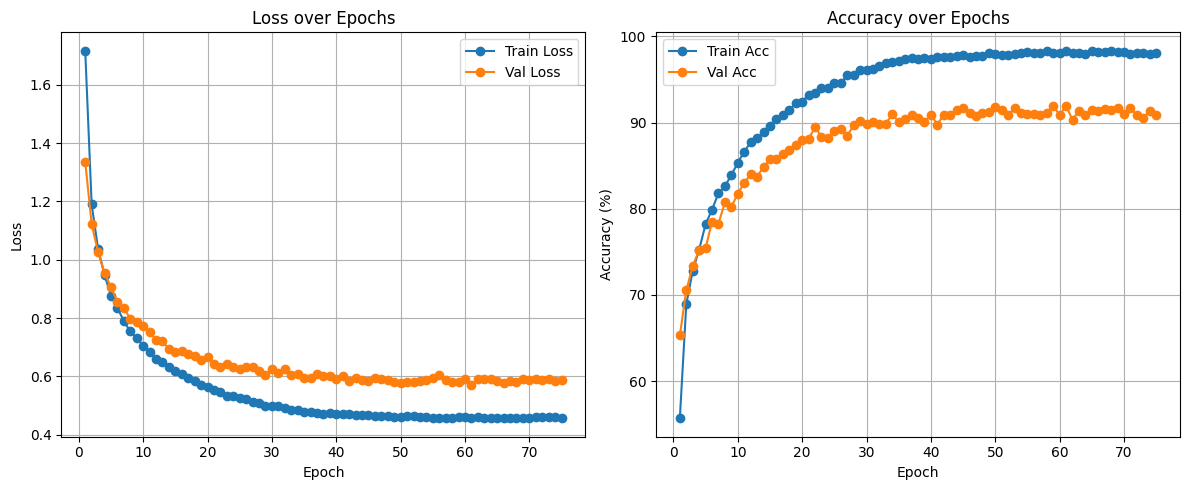

In [16]:
# hyperparameters
num_epochs = 75
learning_rate = 0.001

best_val_acc = 0.0
save_path = "best_model.pth"

# loss function
criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)

# optimizer
# For EfficientNet, fine-tune all parameters, but set a higher LR for the classifier head
# For timm EfficientNet, classifier head is usually 'classifier'
# Backbone params: all except classifier
backbone_params = [p for n, p in model.named_parameters() if not n.startswith('classifier')]
classifier_params = model.get_classifier().parameters()

optimizer = optim.Adam([
    {'params': backbone_params, 'lr': 1e-5},  # backbone
    {'params': classifier_params, 'lr': 1e-3} # classifier head
])
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

# metrics
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
scaler = GradScaler()

# Training and validation loop
for epoch in range(num_epochs):
    print(f"\nEpoch [{epoch+1}/{num_epochs}]")

    # ----- Training -----
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    loop = tqdm(train_loader, desc="Training", leave=False)
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # Use autocast for mixed precision
        with autocast():
            outputs = model(images)
            loss = criterion(outputs, labels)

        # Backprop with gradient scaling
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

        loop.set_postfix(loss=loss.item())

    train_loss = running_loss / len(train_loader)
    train_acc = 100. * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

    # ----- Validation -----
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss = running_loss / len(val_loader)
    val_acc = 100. * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    # Inside validation block (after val_acc = ...)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), save_path)
        print("✅ Best model saved!")

    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    scheduler.step(val_loss)
   
# ------ Plotting ------
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(epochs, val_accuracies, label='Val Acc', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Test Set Evaluation:
                                                                  precision    recall  f1-score   support

           10. Warts Molluscum and other Viral Infections - 1887       0.87      0.79      0.83       297
                                                2. Melanoma 2697       0.95      0.96      0.95       410
                                              4. Carcinoma  2215       0.99      0.89      0.94       326
                                 5. Melanocytic Nevi (NV) - 6944       0.96      0.98      0.97      1031
          8. Seborrheic Keratoses and other Benign Tumors - 1827       0.77      0.85      0.81       268
9. Tinea Ringworm Candidiasis and other Fungal Infections - 1644       0.86      0.88      0.87       248

                                                        accuracy                           0.92      2580
                                                       macro avg       0.90      0.89      0.89      2580
                      

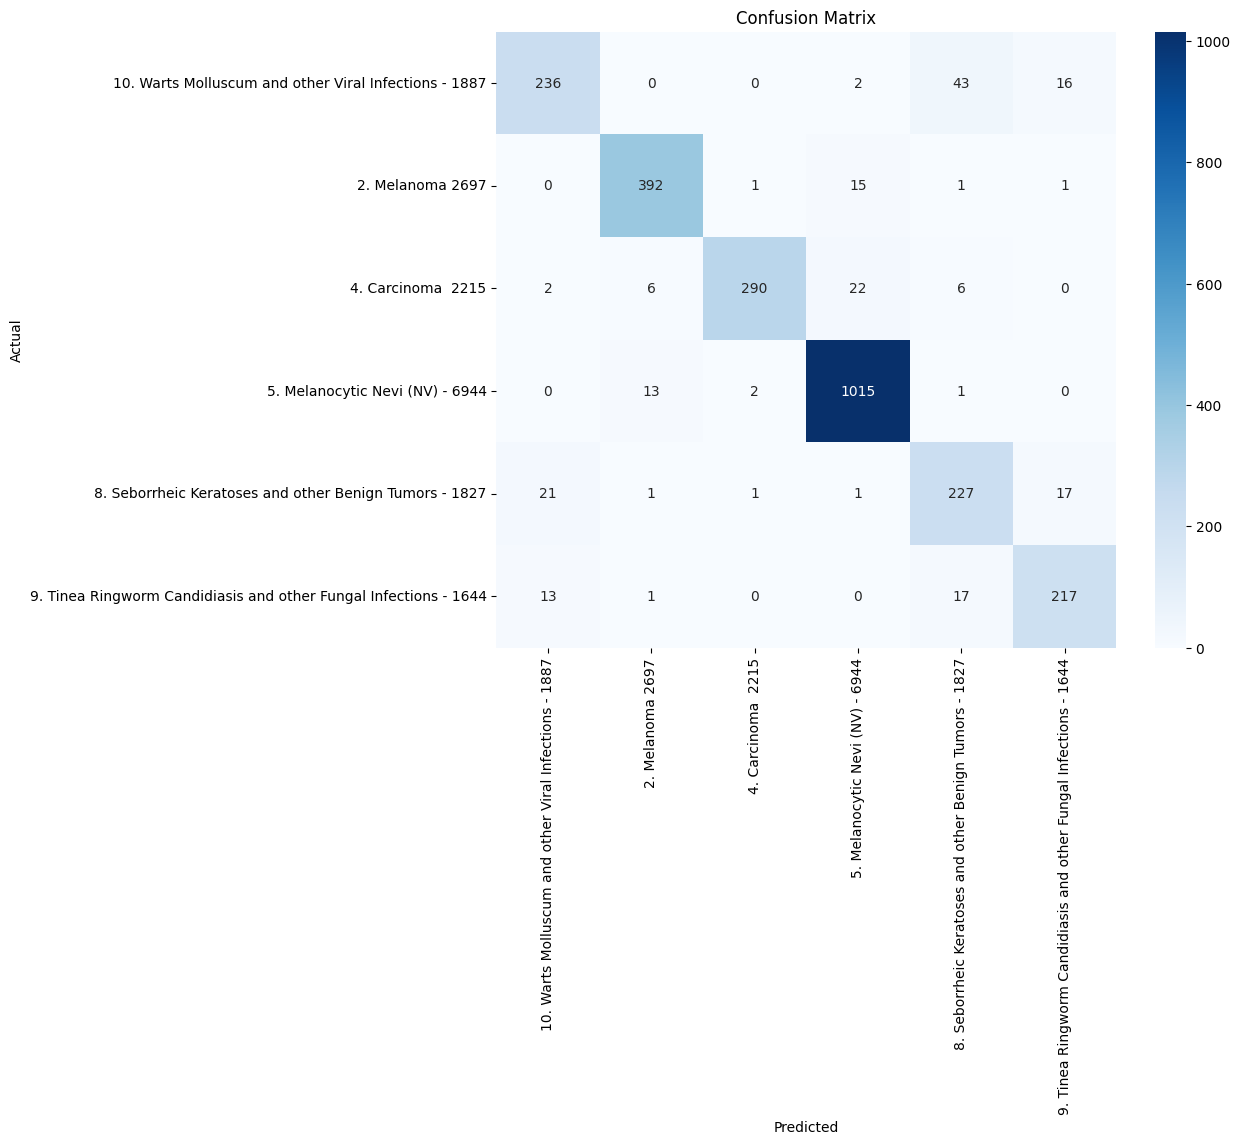

In [17]:
# ----- Test -----
model.eval()
test_preds = []
test_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

# Classification Report
print("\nTest Set Evaluation:")
print(classification_report(test_labels, test_preds, target_names=full_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
